<a href="https://colab.research.google.com/github/R-Nderitu02560/IP/blob/main/Copy_of_Copy_of_Intel_Image_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install keras
!pip install tensorflow==2.7.0.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 489.6 MB 20 kB/s 
     |████████████████████████████████| 463 kB 53.3 MB/s 
     |████████████████████████████████| 1.3 MB 63.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tenso

In [ ]:
#import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import os #imported so files on your computer can be read and loaded easily.
import cv2 #cv2 is a python library used to solve computer vision problems
from tqdm import tqdm #Creates Progress Meters

In [ ]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_labels = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)
print(class_labels)

IMAGE_SIZE = (150, 150)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [ ]:
#Load the dataset
!pip install opendatasets --upgrade --quiet
import opendatasets as od
test_train_path = 'https://www.kaggle.com/datasets/puneet6060/intel-image-classification'
od.download(test_train_path)

#Username - estherwaweru98
#Kaggle key - "62864d34ac3349ee50f44bbe457fdaa4"
 
 

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: estherwaweru98
Your Kaggle Key: ··········


100%|██████████| 346M/346M [00:04<00:00, 83.6MB/s]


In [ ]:
#Check classes
#Train dataset
train_path = '/content/intel-image-classification/seg_train/seg_train'
classes=os.listdir(train_path)
print('Our train dataset has ',len(classes),'classes. The list is ',classes)


#Test dataset
test_path = '/content/intel-image-classification/seg_test/seg_test'
classes_1=os.listdir(test_path)
print('Our test dataset has ',len(classes_1),'classes. The list is ',classes_1)

Our train dataset has  6 classes. The list is  ['sea', 'forest', 'glacier', 'street', 'buildings', 'mountain']
Our test dataset has  6 classes. The list is  ['sea', 'forest', 'glacier', 'street', 'buildings', 'mountain']


# **USING tf.KERAS**

In [ ]:
#create our dataset

def create_datasets():
  datasets = ['/content/intel-image-classification/seg_train/seg_train', '/content/intel-image-classification/seg_test/seg_test']
  output = []
  # Iterate through training and test sets
  for dataset in datasets:
    images = []
    classes = []
    print("Loading {}".format(dataset))
    # Iterate through each folder corresponding to a category
    for folder in os.listdir(dataset):
      classe = class_labels[folder]
      # Iterate through each image in our folder
      for file in tqdm(os.listdir(os.path.join(dataset, folder))):
        # Get the path name of the image
        img_path = os.path.join(os.path.join(dataset, folder), file)
                
        # Open and resize the img
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE) 
        # Append the image and its corresponding label to the output
        images.append(image)
        classes.append(classe)
      
    images = np.array(images, dtype = 'float32')
    classes = np.array(classes, dtype = 'int32')   
      
    output.append((images, classes))

 
  return output
  

In [ ]:
#Split the dataset into our features and labels
(train_images, train_labels), (test_images, test_labels) = create_datasets()

Loading /content/intel-image-classification/seg_train/seg_train


100%|██████████| 2512/2512 [00:03<00:00, 729.85it/s]


Loading /content/intel-image-classification/seg_test/seg_test


100%|██████████| 525/525 [00:00<00:00, 933.18it/s]


In [ ]:
from sklearn.utils import shuffle
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

**EXPLORE OUR DATA**

In [ ]:
#Display a random image from the images array and its correspond label 
def display_random_image(class_names, images, classes):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index].astype("uint8"))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[classes[index]])
    plt.show()

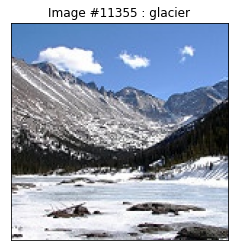

In [ ]:
#Call the function
display_random_image(class_names, train_images, train_labels)

In [ ]:
#View the first 25 images
def show_sample(class_names, images, classes):
    fig = plt.figure(figsize=(10,12))
    fig.suptitle("Sample of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(6,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].astype("uint8"), cmap=plt.cm.binary)
        plt.xlabel(class_names[classes[i]])
    plt.show()

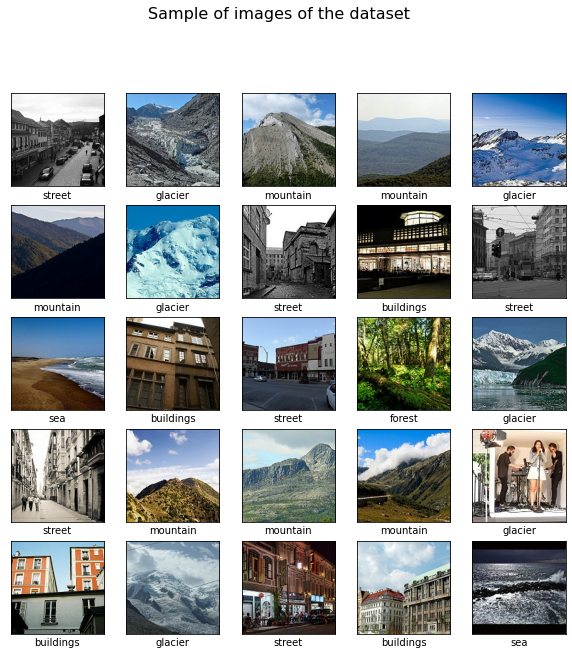

In [ ]:
show_sample(class_names, train_images, train_labels)

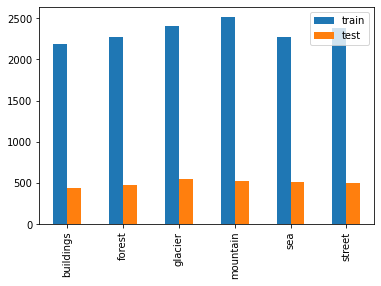

In [ ]:
#Check proportion of each object observed in Train data and Test Data
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

#We can say our data is fairly balanced

# **Standardize the data**

In [ ]:
#standardize values to be in the [0, 1] 
train_images = train_images / 255.0 
test_images = test_images / 255.0

# **MODEL**

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

**Model Architecture**

In [ ]:
#Import libraries needed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization


# **BASELINE MODEL**

Steps are:

1. Build the model,
2. Compile the model,
3. Train / fit the data to the model

Our model is composed of different layers such as:

1. Conv2D: (32 filters of size 3 by 3) The features will be "extracted" from the image.
2. MaxPooling2D: The images get half sized.
3. Conv2D: (64 filters of size 3 by 3) T
4. Flatten: Transforms the format of the images from a 2d-array to a 1d-array of 150 150 3 pixel values.
5. Dense:

And Activation Functions:
1. Relu : given a value x, returns max(x, 0).
2. Softmax: 6 neurons, probability that the image belongs to one of the classes.

In [ ]:
#The Sequential model consists of three convolution blocks 
#(tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. 
#There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it 
#that is activated by a ReLU activation function ('relu'). 
num_classes = 6

model = Sequential()

#Feature extraction layer
#each filter extracts some information from the image such as edges, 
#different kinds of shapes (vertical, horizontal, round), and then all of these are combined to identify the image.

#The convolution layer is the layer where the filter is applied to our input image to extract or detect its features. 
#The pooling layer is applied after the Convolutional layer and is used to reduce the dimensions of the feature map 
#which helps in preserving the important information or features of the input image and reduces the computation time.
model.add(Conv2D(32, 3, activation='relu',input_shape=(150,150,3))), #First Convolutional layer with 32 filters and a kernel size of 3x3. 
model.add(MaxPooling2D()),
model.add(Conv2D(64, 3, activation='relu')),
model.add(MaxPooling2D()),

#Classification layer
#This layer connects the information extracted from the previous steps (i.e Convolution layer and Pooling layers) 
#to the output layer and eventually classifies the input into the desired label.
model.add(Flatten()),#Flatten the output from the previous layer
model.add(Dense(128, activation='relu')), #Dense layer with 128 nodes-This is the fully connected layer
model.add(Dropout(rate = 0.01))
model.add(Dense(64, activation='relu')), #Dense layer with 128 nodes-This is the fully connected layer
model.add(Dropout(rate = 0.01))
model.add(Dense(num_classes,activation = 'softmax')) #Final output with nodes equal to number of classes
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
#Choose the tf.keras.optimizers.Adam optimizer and tf.keras.losses.SparseCategoricalCrossentropy loss function. 
#To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

#Optimizer: adam = RMSProp + Momentum. What is Momentum and RMSProp ?
#Momentum = takes into account past gradient to have a better update.
#RMSProp = exponentially weighted average of the squares of past gradients.
#Loss function: we use sparse categorical crossentropy for classification, each images belongs to one class only
#For loss function,
#categorical cross entropy and sparse categorical cross entropy have the same loss function.
#the only difference is the format in which labels are mentioned
#categorical cross entropy are one hot encoded while sparse categorical cross entropy are integers
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model.compile(loss=losses.SparseCategoricalCrossentropy(), optimizer=adam, metrics=['accuracy'])



In [ ]:
hist_model = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.3)

#Run for 3382.96s

Epoch 1/10
77/77 [==============================] - 381s 5s/step - loss: 1.3314 - accuracy: 0.4907 - val_loss: 0.9163 - val_accuracy: 0.6483
Epoch 2/10
77/77 [==============================] - 356s 5s/step - loss: 0.8253 - accuracy: 0.6912 - val_loss: 0.7423 - val_accuracy: 0.7157
Epoch 3/10
77/77 [==============================] - 358s 5s/step - loss: 0.6227 - accuracy: 0.7766 - val_loss: 0.6804 - val_accuracy: 0.7623
Epoch 4/10
77/77 [==============================] - 352s 5s/step - loss: 0.5160 - accuracy: 0.8179 - val_loss: 0.6427 - val_accuracy: 0.7675
Epoch 5/10
77/77 [==============================] - 367s 5s/step - loss: 0.3615 - accuracy: 0.8767 - val_loss: 0.6304 - val_accuracy: 0.7832
Epoch 6/10
77/77 [==============================] - 347s 5s/step - loss: 0.2447 - accuracy: 0.9201 - val_loss: 0.7863 - val_accuracy: 0.7611
Epoch 7/10
77/77 [==============================] - 387s 5s/step - loss: 0.1735 - accuracy: 0.9462 - val_loss: 0.7290 - val_accuracy: 0.7825
Epoch 8/10
77

In [ ]:
#Plot the accuracy and loss during training of the CNN

def plot_accuracy_loss(history):
  fig = plt.figure(figsize=(15,10))

  #Plot accuracy
  plt.subplot(221)
  plt.plot(history.history['accuracy'],'bo--',label = 'acc') #blue circle marker dotted
  plt.plot(history.history['val_accuracy'],'ro--',label = 'val_accuracy') #red circle marker dotted
  plt.title('Train accuracy vs Validation accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epochs')
  plt.legend()

  #Plot loss function
  plt.subplot(222)
  plt.plot(history.history['loss'],'bo--',label = 'loss') #blue circle marker dotted
  plt.plot(history.history['val_loss'],'ro--',label = 'val_loss') #red circle marker dotted
  plt.title('Train loss vs Validation loss')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.legend()
  plt.show()


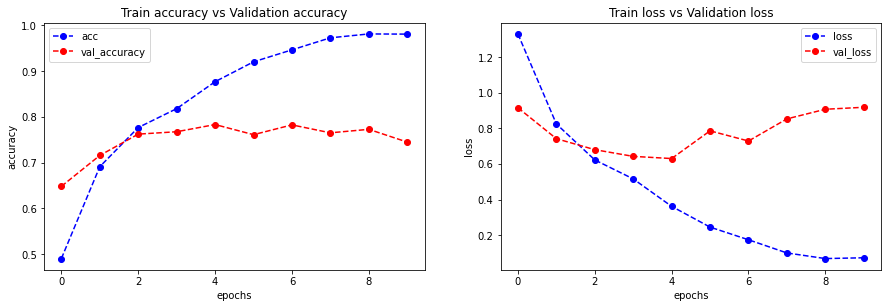

In [ ]:
plot_accuracy_loss(hist_model)

In [ ]:
#Evaluate model on test set
#model.model['accuracy']
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 28s 293ms/step - loss: 0.9547 - accuracy: 0.7473


We have an accuracy of 74% 



# **HYPERPARAMETER TUNING OF NEURAL NETWORKS USING KERAS TUNER**

This helps prevent overfitting and have a good bias and variance trade off.
We are Tuning:


1.   Number of hidden layers
2.   Number of units in each hidden layer
3.  Dropout percentage of each hiden layer
4. Learning rate of Adam Optimizer



In [ ]:
#Keras Tuner make it very simple to tune our hyperparameters of neural networks
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 6.8 MB/s 
     |████████████████████████████████| 1.6 MB 37.6 MB/s 


In [ ]:
#import library
import keras_tuner as kt

In [ ]:
#Build model using keras tuner

def model_builder(hp):
  model = Sequential()
  model.add(Conv2D(32, 3, activation='relu',input_shape=(150,150,3))), 
  model.add(MaxPooling2D()),
  model.add(BatchNormalization())
  model.add(Conv2D(64, 3, activation='relu')),
  model.add(MaxPooling2D()),
  model.add(BatchNormalization())
  model.add(Flatten()),
  hp_units = hp.Int('units',min_value = 32 , max_value = 512 , step = 128) #Define search space for the number of hidden layers and units in each hidden layer
  model.add(Dense(units = hp_units, activation='relu')),
  hp_rate = hp.Float('droupout',0,0.3, step = 0.1) #Define search space for drop oyt percentage
  model.add(Dropout(rate = hp_rate))
  model.add(Dense(units = hp_units, activation='relu')),
  hp_rate = hp.Float('droupout',0,0.3, step = 0.1) #Define search space for drop oyt percentage
  model.add(Dropout(rate = hp_rate))
  model.add(Dense(num_classes,activation = 'softmax')) #Final output with nodes equal to number of classes
  
  #Tune learning rate of the Optimizer(0.01,0.001,0.0001)
  hp_learning_rate = hp.Choice('learning_rate',values = [0.01,0.001,0.0001]) #define search space of the learning rate
  adam = Adam(learning_rate = hp_learning_rate)
  model.compile(loss=losses.SparseCategoricalCrossentropy(), optimizer=adam, metrics=['accuracy'])
  return model

In [ ]:
#Instantiate the tuner
#Because of this computational burden, Grid search is most effective when the optimal selection of some hyper-parameters is already known.
#we will use the Keras module RandomSearch for 
#the optimization of hyperparameter and search the best parameters using the search() method..

tuner = kt.RandomSearch(model_builder,
                    objective='val_accuracy',
                    max_trials = 4)

In [ ]:
#Define search space summary
tuner.search_space_summary()



Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 128, 'sampling': None}
droupout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
#Set callbacks like early stopping and reduce learning rate to stop training early when metrics aren't improving

#stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 5)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
#best_model = tf.keras.callbacks.ModelCheckpoint('bestmodel.hdf5', monitor='val_accuracy', save_best_only=True)

tuner.search(train_images,train_labels,epochs = 5 , validation_split=0.3)

Trial 5 Complete [00h 38m 24s]
val_accuracy: 0.187128946185112

Best val_accuracy So Far: 0.7698884010314941
Total elapsed time: 03h 34m 52s


In [ ]:
#Get best parameters and retrain model
best_hps = tuner.get_best_models(num_models=1)[0]

#summary of best model
best_hps.summary()

#Build model
model2 = tuner.hypermodel.build(best_hps)

#Train the model
h_model2 = model2.fit(train_images,train_labels,epochs = 10 , validation_split = 0.3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

AttributeError: ignored

In [ ]:
plot_accuracy_loss(model2)

In [ ]:
#Evaluate model on test set
#model.model['accuracy']
test_loss = model2.evaluate(test_images, test_labels)

**Test model on Random Objects**

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

# **Error analysis**

In [ ]:
#A function to print mislabelled images
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    show_sample(class_names,  mislabeled_images, mislabeled_labels)

In [ ]:
#Call the function
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

In [ ]:
#Construct a confusion matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

# **Conclusion**

Our model has trouble with 2 kinds of images. It has trouble with street and buildings. Well, it can be understandable as there are some buildings in the street. It has also trouble with sea, glacier and mountain as well. However, it can detects forest very accurately!